In [1]:
import sys
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import openpyxl
from tabulate import tabulate
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from PIL import Image
from termcolor import colored, cprint

In [2]:
def prioridadErr(secuencia):
    max_consecutivos = 0
    consecutivos_actuales = 0

    for elemento in secuencia:
        if elemento == 1:
            consecutivos_actuales += 1
            max_consecutivos = max(max_consecutivos, consecutivos_actuales)
        else:
            consecutivos_actuales = 0

    return max_consecutivos
 

In [3]:
excel_dataframe = openpyxl.load_workbook("C:/Users/Usuario/Desktop/Proyectos/EncoderLineal/Excel/Datos/Encoder_Lineal_2.xlsx")
dataframe=excel_dataframe.active
data, x_datos, y_datos = [], [], []
for row in range(1, dataframe.max_row ):
    _row= [row,]
    for col in dataframe.iter_cols(1,dataframe.max_column):
        _row.append(col[row].value)
    data.append(_row)

df = pd.DataFrame(data, columns=["Cantidad", "output", "input"])
x_datos  = df["input"].tolist()
x_datos  = df["input"].tolist()
y_datos = df["output"].tolist()

In [4]:

# x_datos = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
#                   21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

# y_datos = np.array([2, 4, 1, 5, 3, 7, 9, 8, 10, 12, 3, 1, 5, 2, 4, 11, 13, 12, 15, 14, 1, 3, 5, 2, 
#                     4, 17, 19, 18, 20, 22,  23, 25, 24, 27, 26,  16, 18, 20, 22, 24]) 

x_datos_ = np.copy(x_datos)
y_datos_ = np.copy(y_datos)

In [5]:
errAbsMax=0.015*np.abs(np.max(y_datos))/100
errAbsMax_Comprobar=0.2*np.abs(np.max(y_datos))/100
print(errAbsMax)
print(errAbsMax_Comprobar)

0.042749999999999996
0.57


In [6]:
minPoint=3 # +1 numero de puntos, ejemplo, si minPoint es 3, entonces evalua como minimimo 4 puntos
despValores = []
errAcumuladoAbs = []
while len(x_datos_) > minPoint:
    errAcumuladoSecuencia = []
    if minPoint < 3:
        print('***  inserte más puntos ***')
        break
    r_cuadrado = []
    for i in range(minPoint, len(x_datos_)+1):
        pendiente, intercepto, r_valor, _, _ = linregress(x_datos_[0:i], y_datos_[0:i]) # datos de la regresión lineal
        
        for ii in range(0, i):
            y_datosPredicciones=pendiente*x_datos_[ii]+intercepto # vemos el error en cada punto, el error absoluto no debe superar el 0.2%
            y_datosErr=np.abs(y_datosPredicciones-y_datos_[ii])
            if y_datosErr < errAbsMax:
                errAcumuladoAbs.append(1)
            else:
                errAcumuladoAbs.append(0)
        # print(f' hmm:{errAcumuladoAbs}')
        errAcumuladoSecuencia.append(errAcumuladoAbs) #aqui se acumula listas de listas de los errores para elegir ya que todos los R^2 aon altos
        # print(x_datos_[0:i],i, r_valor**2, )
        r_cuadrado.append(r_valor**2)
        errAcumuladoAbs = []
    
    # print(x_datos_)
    
    mejor_secuencia = max(enumerate(errAcumuladoSecuencia), key=lambda x: prioridadErr(x[1]))# Obtener la mejor secuencia y su posición
    posicion, secuencia = mejor_secuencia # Desempaquetar la tupla resultante 
    
    posicion_r2=np.argmax(r_cuadrado)+minPoint-1
    posicion = posicion+minPoint-1

    cprint(f'la secuencia es: {secuencia} --------', 'black', 'on_yellow', attrs=[ "blink"])
    print("secuencia está en la posición:", posicion, "----------------------------")
    print("el mejor r2 está en la posición:", posicion_r2, "----------------------------")

    # if np.max(r_cuadrado)>0.99:
    #     if posicion_r2>posicion:
    #         posicionFinal=posicion
    #     else:
    #         posicionFinal=posicion_r2
    if posicion_r2<posicion:
        posicionFinal=posicion_r2
    else:
        posicionFinal=posicion
    # print(np.max(r_cuadrado),posicion_r2 ,posicion, posicionFinal)   
    despValores.append(posicionFinal)
    despValores_=despValores[-1]
    x_datos_ = np.roll(x_datos_, shift=-despValores_)[:len(x_datos_)-despValores_] #desplazamiento de valores copiados x
    y_datos_ = np.roll(y_datos_, shift=-despValores_)[:len(y_datos_)-despValores_] #desplazamiento de valores copiados y 
    if 1<len(x_datos_) <= minPoint  :
        despValores.append(len(x_datos_))
        break
        
    
    

la secuencia es: [0, 0, 1, 1, 0] --------
secuencia está en la posición: 4 ----------------------------
el mejor r2 está en la posición: 16 ----------------------------
la secuencia es: [0, 0, 1, 1] --------
secuencia está en la posición: 3 ----------------------------
el mejor r2 está en la posición: 7 ----------------------------
la secuencia es: [0, 0, 0, 0, 0, 0, 1] --------
secuencia está en la posición: 6 ----------------------------
el mejor r2 está en la posición: 18 ----------------------------
la secuencia es: [1, 1, 0, 0, 0, 0] --------
secuencia está en la posición: 5 ----------------------------
el mejor r2 está en la posición: 3 ----------------------------
la secuencia es: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0] --------
secuencia está en la posición: 21 ----------------------------
el mejor r2 está en la posición: 9 ----------------------------
la secuencia es: [0, 0, 1] --------
secuencia está en la posición: 2 ----------------------------
el

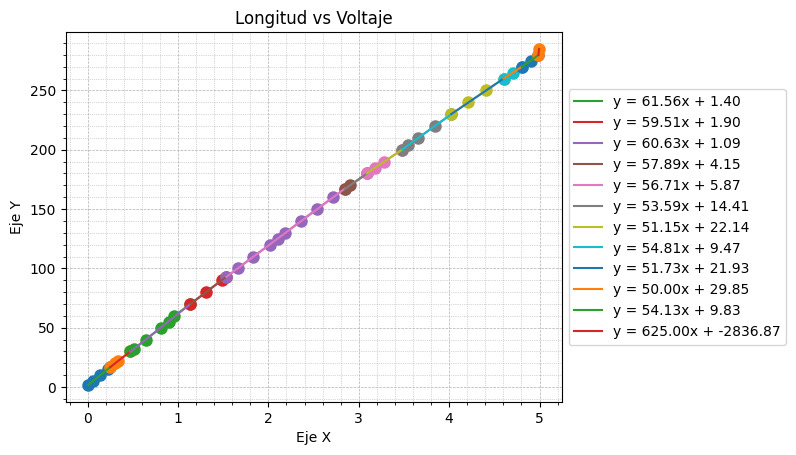

In [7]:
x_Nuevo = []
y_Nuevo = []
m_val_ = [] 
b_val_ = []

for i in range(len(despValores)):
    if i==0 :
        despMin=0
        despMax=despValores[i]
    else:
        despMin+=despValores[i-1]
        despMax+=despValores[i]
    _despValores_=despValores[i]
    x_Nuevo.append([])  # creamos para c ada array 
    y_Nuevo.append([])  # creamos para c ada array 
    x_Nuevo[i].append(x_datos[despMin:despMax+1]) #agregamos en el segundo [] segun su rango de min y max
    y_Nuevo[i].append(y_datos[despMin:despMax+1]) #agregamos en el segundo [] segun su rango de min y max
    m_val, b_val, r_val, p_val, std_error = linregress(x_datos[despMin:despMax+1], y_datos[despMin:despMax+1])
    m_val_.append(m_val)
    b_val_.append(b_val) 


#Grafica
fig, ax = plt.subplots()

for x, y in zip(x_Nuevo, y_Nuevo):
    ax.plot(x[0], y[0], marker='o', linestyle='-', markersize=8)
 
for m, b, i in zip(m_val_, b_val_, range(len(despValores)) ):
    x_values = np.linspace(x_Nuevo[i][0][0], x_Nuevo[i][0][-1], 2)
    y_values = m * x_values + b
    ax.plot(x_values, y_values, label=f'y = {m:.2f}x + {b:.2f}')
# print(m_val_)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Longitud vs Voltaje')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
# ax.legend() 
# ax.grid(True)
# resolucion_dpi = 1200
# plt.savefig('C:/Users/Usuario/Desktop/Proyectos/EncoderLineal/Python/LongVSVolt', dpi=resolucion_dpi)
# plt.show()
# img = Image.open('C:/Users/Usuario/Desktop/Proyectos/EncoderLineal/Python/LongVSVolt.png')
# img.show()
plt.show()

In [8]:

# #Grafica
# fig, ax = plt.subplots()

# for x, y in zip(x_Nuevo, y_Nuevo):
#     ax.plot(x[0], y[0], marker='o', linestyle='-', markersize=8)

# plt.grid(which='both', linestyle='--', linewidth=0.5)
# plt.minorticks_on()
# plt.grid(which='minor', linestyle=':', linewidth=0.5) 
# ax.set_title('Longitud vs Voltaje')
# ax.set_xlabel('Eje X')
# ax.set_ylabel('Eje Y')
# # resolucion_dpi = 1200
# # plt.savefig('C:/Users/Usuario/Desktop/Proyectos/EncoderLineal/Python/LongVSVolt2', dpi=resolucion_dpi)
# # plt.show()
# # img = Image.open('C:/Users/Usuario/Desktop/Proyectos/EncoderLineal/Python/LongVSVolt2.png')
# # img.show()
# plt.show()

[61.55824550613626, 59.51087929532244, 60.62980709824663, 57.89485832108759, 56.71117471209817, 53.59394703657004, 51.15472059351439, 54.81258923483084, 51.73020543555204, 49.99999999999995, 54.13463047230498, 624.9999999999994]


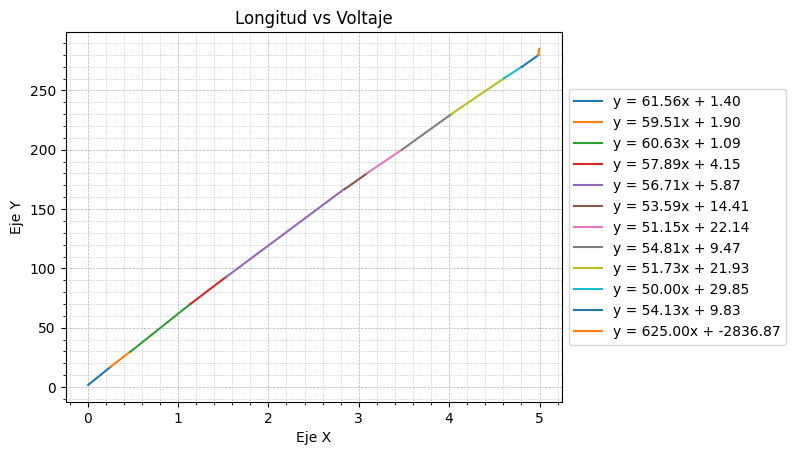

In [9]:
 
    
#Grafica
fig, ax = plt.subplots()

for m, b, i in zip(m_val_, b_val_, range(len(despValores)) ):
    x_values = np.linspace(x_Nuevo[i][0][0], x_Nuevo[i][0][-1], 2)
    y_values = m * x_values + b
    ax.plot(x_values, y_values, label=f'y = {m:.2f}x + {b:.2f}')
print(m_val_)
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_title('Longitud vs Voltaje')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
# ax.legend() 
# ax.grid(True)
# resolucion_dpi = 1200
# plt.savefig('C:/Users/Usuario/Desktop/Proyectos/EncoderLineal/Python/LongVSVolt3', dpi=resolucion_dpi)
# plt.show()
# img = Image.open('C:/Users/Usuario/Desktop/Proyectos/EncoderLineal/Python/LongVSVolt3.png')
# img.show()
plt.show() 

voltaje medido = 0.4715 |err = 0.11% error mayor a 0.1% | error=0.32 cm | y= 30 | Yp = 29.677 
voltaje medido = 0.814 |err = 0.16% error mayor a 0.1% | error=-0.44 cm | y= 50 | Yp = 50.442 
voltaje medido = 0.896 |err = 0.15% error mayor a 0.1% | error=-0.41 cm | y= 55 | Yp = 55.414 
voltaje medido = 0.96 |err = 0.25% error mayor a 0.1% | error=0.71 cm | y= 60 | Yp = 59.294 
voltaje medido = 1.831 |err = 0.10% error mayor a 0.1% | error=0.30 cm | y= 110 | Yp = 109.705 
voltaje medido = 2.107 |err = 0.13% error mayor a 0.1% | error=-0.36 cm | y= 125 | Yp = 125.357 
voltaje medido = 2.36 |err = 0.10% error mayor a 0.1% | error=0.29 cm | y= 140 | Yp = 139.705 
voltaje medido = 2.536 |err = 0.11% error mayor a 0.1% | error=0.31 cm | y= 150 | Yp = 149.686 
voltaje medido = 4.905 |err = 0.13% error mayor a 0.1% | error=-0.36 cm | y= 275 | Yp = 275.361 


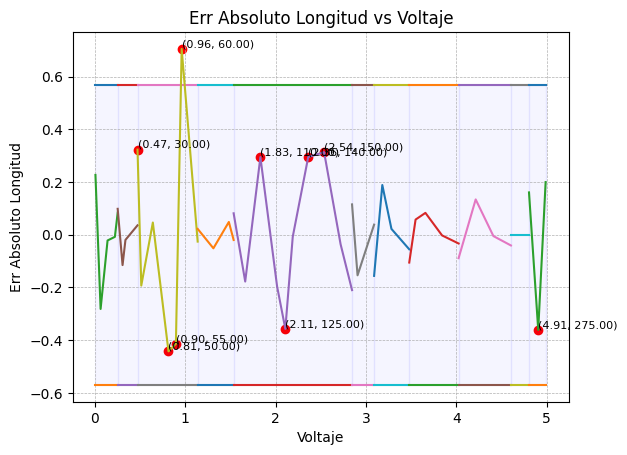

In [10]:
# errAbsMax_Comprobar=0.6
fig, ax = plt.subplots()
y1, y2 = errAbsMax_Comprobar, -errAbsMax_Comprobar
for m, b, i in zip(m_val_, b_val_, range(len(despValores))):
    x_values = np.copy(x_Nuevo[i][0][:])
    y_values_a = np.copy(y_Nuevo[i][0][:])
    y_values_p= m * x_values + b
    y_values = y_values_a - y_values_p
    for j in range(len(y_values)):
        if y_values_a[j] > 0:
            y_errValues = 100 * np.abs(y_values[j]) / np.abs(np.max(y_datos))
        else:
            y_errValues = -0.1
        if y_errValues > 0.1:
            ax.scatter(x_values[j], y_values[j], color='red') # Punto rojo en el gráfico
            ax.text(x_values[j], y_values[j], f'({x_values[j]:.2f}, {y_values_a[j]:.2f})'
                    , color='black', fontsize=8, ha='left', va='bottom') # Etiqueta para el punto rojo
            cprint(f'voltaje medido = {x_values[j]} |err = {y_errValues:0.2f}% error mayor a 0.1% | error={y_values[j]:0.2f} cm | y= { y_values_a[j]} | Yp = {y_values_p[j]:0.3f} ',
                   'black', 'on_yellow')
    ax.fill_between(x_values, y1, y2, color='blue', alpha=0.04)
    plt.plot(x_values, np.full_like(x_values, y1))
    plt.plot(x_values, np.full_like(x_values, y2))
    ax.plot(x_values, y_values)
ax.set_title('Err Absoluto Longitud vs Voltaje')
ax.set_xlabel('Voltaje')
ax.set_ylabel('Err Absoluto Longitud')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show() 


In [11]:
# for i in range(len(despValores)):
#     print(x_Nuevo[i][0][0],'-------', x_Nuevo[i][0][-1])

In [12]:
vol1=1.57
for i in range(len(despValores)):
   if vol1 >=x_Nuevo[i][0][0] and vol1 < x_Nuevo[i][0][-1]:
       resol=  m_val_[i]*vol1 + b_val_[i]
       print(f'{resol:.2f}')
       break


94.90


In [13]:
condicional_1 = 'r_voltaje'
condicional_2 = 'r_longitudNoLineal'

for i in range(len(despValores)):
    if i == 0:
        print(f"IF {condicional_1} >={x_Nuevo[i][0][0]} AND {condicional_1} < {x_Nuevo[i][0][-1]} THEN")
        print(f"    {condicional_2} :=  {m_val_[i]}*{condicional_1} + {b_val_[i]:.5f} ;    //Recta {i+1}")
    elif 0 < i < len(despValores) - 1:
        print(f"ELSIF {condicional_1} >={x_Nuevo[i][0][0]} AND {condicional_1} < {x_Nuevo[i][0][-1]} THEN")
        print(f"    {condicional_2} :=  {m_val_[i]:.5f}*{condicional_1} + {b_val_[i]:.5f} ;    //Recta {i+1}")
    else:
        print(f"ELSIF {condicional_1} >={x_Nuevo[i][0][0]}  THEN")
        print(f"    {condicional_2} :=  {m_val_[i]:.5f}*{condicional_1} + {b_val_[i]:.5f} ;    //Recta {i+1}")
        print(f"ELSE")
        print(f"    {condicional_2} :=  0.0000 ; ")
        print(f"END_IF")


IF r_voltaje >=0.006 AND r_voltaje < 0.252 THEN
    r_longitudNoLineal :=  61.55824550613626*r_voltaje + 1.40346 ;    //Recta 1
ELSIF r_voltaje >=0.252 AND r_voltaje < 0.4715 THEN
    r_longitudNoLineal :=  59.51088*r_voltaje + 1.90472 ;    //Recta 2
ELSIF r_voltaje >=0.4715 AND r_voltaje < 1.137 THEN
    r_longitudNoLineal :=  60.62981*r_voltaje + 1.08980 ;    //Recta 3
ELSIF r_voltaje >=1.137 AND r_voltaje < 1.535 THEN
    r_longitudNoLineal :=  57.89486*r_voltaje + 4.15115 ;    //Recta 4
ELSIF r_voltaje >=1.535 AND r_voltaje < 2.845 THEN
    r_longitudNoLineal :=  56.71117*r_voltaje + 5.86680 ;    //Recta 5
ELSIF r_voltaje >=2.845 AND r_voltaje < 3.089 THEN
    r_longitudNoLineal :=  53.59395*r_voltaje + 14.40984 ;    //Recta 6
ELSIF r_voltaje >=3.089 AND r_voltaje < 3.478 THEN
    r_longitudNoLineal :=  51.15472*r_voltaje + 22.13908 ;    //Recta 7
ELSIF r_voltaje >=3.478 AND r_voltaje < 4.024 THEN
    r_longitudNoLineal :=  54.81259*r_voltaje + 9.46722 ;    //Recta 8
ELSIF r_voltaj